<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/machine_learning_bootcamp/Credit_Default_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Default ML model lab
# Machine learning bootcamp

In [61]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mutual_info_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
!pip install kaggle

import os

os.environ['KAGGLE_USERNAME'] = 'johnmohsbeck'
os.environ['KAGGLE_KEY'] = 'd1f230cf1aba75ec936a726ca195c7a1'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import kaggle

kaggle.api.dataset_download_files('pratjain/credit-card-default', path='./data', unzip=True)

## Read the Dataset

https://www.kaggle.com/datasets/pratjain/credit-card-default


In [4]:
df = pd.read_csv('./data/credit_card_default_TRAIN.csv')

In [5]:
df.shape

(22501, 25)

In [6]:
df.head()

,Variable,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
first_rec = df.iloc[0]
print(first_rec)

Variable                            ID
X1                           LIMIT_BAL
X2                                 SEX
X3                           EDUCATION
X4                            MARRIAGE
X5                                 AGE
X6                               PAY_0
X7                               PAY_2
X8                               PAY_3
X9                               PAY_4
X10                              PAY_5
X11                              PAY_6
X12                          BILL_AMT1
X13                          BILL_AMT2
X14                          BILL_AMT3
X15                          BILL_AMT4
X16                          BILL_AMT5
X17                          BILL_AMT6
X18                           PAY_AMT1
X19                           PAY_AMT2
X20                           PAY_AMT3
X21                           PAY_AMT4
X22                           PAY_AMT5
X23                           PAY_AMT6
Y           default payment next month
Name: 0, dtype: object


In [8]:
cols = first_rec.to_list()

In [9]:
cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [10]:
df.columns = cols

In [11]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [12]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 1 to 22500
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          22500 non-null  object
 1   LIMIT_BAL                   22500 non-null  object
 2   SEX                         22500 non-null  object
 3   EDUCATION                   22500 non-null  object
 4   MARRIAGE                    22500 non-null  object
 5   AGE                         22500 non-null  object
 6   PAY_0                       22500 non-null  object
 7   PAY_2                       22500 non-null  object
 8   PAY_3                       22500 non-null  object
 9   PAY_4                       22500 non-null  object
 10  PAY_5                       22500 non-null  object
 11  PAY_6                       22500 non-null  object
 12  BILL_AMT1                   22500 non-null  object
 13  BILL_AMT2                   22500 non-null  ob

## Transpose the Dataset to Make it Wide (not long)

In [15]:
df.head().T

,1,2,3,4,5
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


Data Types

Column Names and Naming Conventions

In [16]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [17]:
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_')

In [18]:
df.dtypes

id                            object
limit_bal                     object
sex                           object
education                     object
marriage                      object
age                           object
pay_0                         object
pay_2                         object
pay_3                         object
pay_4                         object
pay_5                         object
pay_6                         object
bill_amt1                     object
bill_amt2                     object
bill_amt3                     object
bill_amt4                     object
bill_amt5                     object
bill_amt6                     object
pay_amt1                      object
pay_amt2                      object
pay_amt3                      object
pay_amt4                      object
pay_amt5                      object
pay_amt6                      object
default_payment_next_month    object
dtype: object

In [19]:
df.nunique()

id                            22500
limit_bal                        77
sex                               2
education                         7
marriage                          4
age                              55
pay_0                            11
pay_2                            11
pay_3                            11
pay_4                            11
pay_5                            10
pay_6                            10
bill_amt1                     17712
bill_amt2                     17398
bill_amt3                     17152
bill_amt4                     16769
bill_amt5                     16359
bill_amt6                     15972
pay_amt1                       6592
pay_amt2                       6476
pay_amt3                       6050
pay_amt4                       5732
pay_amt5                       5674
pay_amt6                       5684
default_payment_next_month        2
dtype: int64

Drop unnecessary features

In [20]:
df.drop(['id'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 1 to 22500
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   limit_bal                   22500 non-null  object
 1   sex                         22500 non-null  object
 2   education                   22500 non-null  object
 3   marriage                    22500 non-null  object
 4   age                         22500 non-null  object
 5   pay_0                       22500 non-null  object
 6   pay_2                       22500 non-null  object
 7   pay_3                       22500 non-null  object
 8   pay_4                       22500 non-null  object
 9   pay_5                       22500 non-null  object
 10  pay_6                       22500 non-null  object
 11  bill_amt1                   22500 non-null  object
 12  bill_amt2                   22500 non-null  object
 13  bill_amt3                   22500 non-null  ob

In [22]:
df.to_csv('credit_default_pre1.csv')

Check for duplicates

In [23]:
duplicates = df.duplicated()

In [24]:
duplicates.sum()

20

In [25]:
df.drop_duplicates(keep='first', inplace=True)

In [26]:
df.shape

(22480, 24)

Check for missing values

In [27]:
df.isna().sum()

limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      0
default_payment_next_month    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22480 entries, 1 to 22500
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   limit_bal                   22480 non-null  object
 1   sex                         22480 non-null  object
 2   education                   22480 non-null  object
 3   marriage                    22480 non-null  object
 4   age                         22480 non-null  object
 5   pay_0                       22480 non-null  object
 6   pay_2                       22480 non-null  object
 7   pay_3                       22480 non-null  object
 8   pay_4                       22480 non-null  object
 9   pay_5                       22480 non-null  object
 10  pay_6                       22480 non-null  object
 11  bill_amt1                   22480 non-null  object
 12  bill_amt2                   22480 non-null  object
 13  bill_amt3                   22480 non-null  ob

## Change data types to numeric: float or int

In [29]:
for col in df:
  if col == 'limit_bal':
    df[col] = df[col].astype('float')
  elif 'amt' in col:
    df[col] = df[col].astype('float')
  else:
    df[col] = df[col].astype('int')
  print(col)

limit_bal
sex
education
marriage
age
pay_0
pay_2
pay_3
pay_4
pay_5
pay_6
bill_amt1
bill_amt2
bill_amt3
bill_amt4
bill_amt5
bill_amt6
pay_amt1
pay_amt2
pay_amt3
pay_amt4
pay_amt5
pay_amt6
default_payment_next_month


In [30]:
df.dtypes

limit_bal                     float64
sex                             int64
education                       int64
marriage                        int64
age                             int64
pay_0                           int64
pay_2                           int64
pay_3                           int64
pay_4                           int64
pay_5                           int64
pay_6                           int64
bill_amt1                     float64
bill_amt2                     float64
bill_amt3                     float64
bill_amt4                     float64
bill_amt5                     float64
bill_amt6                     float64
pay_amt1                      float64
pay_amt2                      float64
pay_amt3                      float64
pay_amt4                      float64
pay_amt5                      float64
pay_amt6                      float64
default_payment_next_month      int64
dtype: object

################################################################################


In [31]:
df.rename(columns={'default_payment_next_month':'default'}, inplace=True)

Split the Data for Testing and Training

In [32]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

Train, Test, Validate

In [33]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.default.values
y_val = df_val.default.values

del df_train['default']
del df_val['default']

Exploratory Data Analysis

In [34]:
df_train_full.isnull().sum()

limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

Validate the Distribution of the Target Variable

In [35]:
df_train_full.default.value_counts()

0    13930
1     4054
Name: default, dtype: int64

In [36]:
defaulted = 4054/(4054 + 13930)
print("percentage of customers Defaulted: ", round(defaulted, 5))

percentage of customers Defaulted:  0.22542


Compute the MEAN of the Target Variable

In [37]:
global_mean = df_train_full.default.mean()
round(global_mean, 3)


0.225

## We have an ImBalanced Dataset

# Numerical Columns Require Different Treatments

## numerical: will have the names of numerical variables

## categorical columns have few numeric values

In [38]:
numerical = ['limit_bal','age','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6','pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6']

categorical = ['sex', 'education', 'marriage']


# Numerical Data

## Get the Descriptive statistics for each column (Univariate Analysis)

In [39]:
df_train_full[numerical].describe()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,17984.000000,1.798400e+04,17984.000000,17984.000000,17984.000000,17984.000000,1.798400e+04,17984.000000,17984.000000,17984.000000,17984.000000
mean,163737.415480,35.197120,0.014012,-0.099589,-0.132507,-0.192504,-0.238823,-0.261288,50399.448788,48434.668872,4.626113e+04,42167.730649,39986.747998,38643.436054,5484.431272,5.767289e+03,4787.711021,4659.101368,4710.843250,5048.734319
std,128529.716674,9.303451,1.114789,1.193754,1.198510,1.158744,1.128541,1.150113,71090.058184,68894.062529,6.732882e+04,62014.962831,59477.727782,58480.879713,15426.304170,2.131107e+04,14312.799326,14640.814424,14789.971146,16791.132472
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-46627.000000,-51183.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3858.750000,3272.500000,3.002000e+03,2430.750000,1905.750000,1339.750000,1000.000000,8.200000e+02,381.000000,300.000000,291.000000,104.750000
50%,140000.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23160.000000,22081.500000,2.046650e+04,19145.000000,18401.000000,17423.000000,2100.000000,2.000000e+03,1684.000000,1500.000000,1500.000000,1500.000000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65923.000000,62999.750000,5.952325e+04,52289.500000,49911.000000,49051.000000,5000.000000,5.000000e+03,4250.000000,4000.000000,4003.000000,4000.000000
max,800000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,610723.000000,572834.000000,1.664089e+06,628699.000000,823540.000000,699944.000000,505000.000000,1.684259e+06,371718.000000,497000.000000,417990.000000,527143.000000


# Correlations

In [40]:
df_train_full.corr()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
limit_bal,1.000000,0.013176,-0.235039,-0.104543,0.146169,-0.262975,-0.294270,-0.283341,-0.262753,-0.242959,...,0.289704,0.290311,0.287934,0.200111,0.191452,0.220586,0.203286,0.222311,0.225792,-0.143557
sex,0.013176,1.000000,0.014841,-0.014753,-0.133654,-0.048603,-0.057229,-0.058781,-0.048830,-0.042114,...,-0.021123,-0.020523,-0.018608,0.003217,-0.005282,-0.003615,-0.003847,-0.000381,-0.014366,-0.046386
education,-0.235039,0.014841,1.000000,-0.140316,0.165728,0.114870,0.134301,0.122018,0.119453,0.105759,...,-0.002108,-0.007075,-0.007272,-0.043201,-0.033584,-0.041795,-0.038966,-0.042717,-0.046146,0.029121
marriage,-0.104543,-0.014753,-0.140316,1.000000,-0.419362,0.014221,0.017820,0.028212,0.025724,0.032136,...,-0.027366,-0.027598,-0.026070,-0.019259,-0.020604,-0.013206,-0.014897,-0.005221,-0.006271,-0.033064
age,0.146169,-0.133654,0.165728,-0.419362,1.000000,-0.027852,-0.044182,-0.047200,-0.042203,-0.045408,...,0.055006,0.054419,0.054366,0.030252,0.025684,0.028375,0.019441,0.023145,0.017733,0.014073
pay_0,-0.262975,-0.048603,0.114870,0.014221,-0.027852,1.000000,0.662813,0.562804,0.529948,0.497795,...,0.179247,0.181170,0.175431,-0.087880,-0.082691,-0.083370,-0.065149,-0.063066,-0.064241,0.322446
pay_2,-0.294270,-0.057229,0.134301,0.017820,-0.044182,0.662813,1.000000,0.759605,0.657052,0.614374,...,0.221823,0.220452,0.215521,-0.085677,-0.071886,-0.064114,-0.050660,-0.045977,-0.039070,0.257033
pay_3,-0.283341,-0.058781,0.122018,0.028212,-0.047200,0.562804,0.759605,1.000000,0.773770,0.678935,...,0.225251,0.222335,0.218655,0.004184,-0.074857,-0.063533,-0.049774,-0.038358,-0.039140,0.231303
pay_4,-0.262753,-0.048830,0.119453,0.025724,-0.042203,0.529948,0.657052,0.773770,1.000000,0.817870,...,0.247739,0.244201,0.238582,-0.007350,-0.001457,-0.071259,-0.042521,-0.036017,-0.027838,0.212623
pay_5,-0.242959,-0.042114,0.105759,0.032136,-0.045408,0.497795,0.614374,0.678935,0.817870,1.000000,...,0.274233,0.271004,0.262493,-0.007535,-0.008290,0.012233,-0.061510,-0.036420,-0.028997,0.203901


# Feature Importance

## Feature Importance Based on Sex, Education, Marriage

In [41]:
male_mean = df_train_full[df_train_full.sex == 1].default.mean()

female_mean = df_train_full[df_train_full.sex == 2].default.mean()

## MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [42]:
never_married = df_train_full[df_train_full.marriage == 0].default.mean()

married_mean = df_train_full[df_train_full.marriage == 1].default.mean()

single_mean = df_train_full[df_train_full.marriage == 2].default.mean()

other_mean  = df_train_full[df_train_full.marriage == 3].default.mean()

## EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [43]:
grad_school_mean = df_train_full[df_train_full.education == 1].default.mean()

university_mean = df_train_full[df_train_full.education == 2].default.mean()

high_school_mean = df_train_full[df_train_full.education == 3].default.mean()

other_mean  = df_train_full[df_train_full.education == 4].default.mean()

unknown_mean = df_train_full[df_train_full.education > 4].default.mean()

## Risk Ratio

##  risk = group rate / global_rate

## Compute Risk Ratio

In [44]:
global_mean = df_train_full.default.mean()
print('global_mean: ', round(global_mean, 5))

df_group = df_train_full.groupby(by='sex').default.agg(['mean'])

df_group['diff'] = df_group['mean'] - global_mean

df_group['risk'] = df_group['mean'] / global_mean

df_group


global_mean:  0.22542


,mean,diff,risk
sex,,,
1,0.249505,0.024082,1.106832
2,0.209822,-0.015600,0.930795


## Risk Ratio for ALL Categorical Variables

## Converted Analysis

## Mutual Information : Categorical

In [45]:
def calculate_mi(series):
 return mutual_info_score(series, df_train_full.default)

In [46]:
df_mi = df_train_full[categorical].apply(calculate_mi)

df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

print(round(df_mi, 5))

                MI
education  0.00274
marriage   0.00107
sex        0.00107


# Correlation Coefficient

In [47]:
df_train_full[numerical].corrwith(df_train_full.default)

limit_bal   -0.143557
age          0.014073
pay_0        0.322446
pay_2        0.257033
pay_3        0.231303
pay_4        0.212623
pay_5        0.203901
pay_6        0.183886
bill_amt1   -0.016571
bill_amt2   -0.010090
bill_amt3   -0.007125
bill_amt4   -0.000658
bill_amt5    0.002427
bill_amt6    0.004218
pay_amt1    -0.075394
pay_amt2    -0.054353
pay_amt3    -0.061984
pay_amt4    -0.055503
pay_amt5    -0.052828
pay_amt6    -0.056244
dtype: float64

# Machine learning

## Predictive Analytics from the clean Telco Dataset

## ML for Classification


## Linear Regression from Scratch in Python

In [48]:
def linear_regression(xi):
  result = bias
  for j in range(n):
    result = result + xi[j] * w[j]
  return result

## Logistic Regression from Scratch using Python

In [49]:
def logistic_regression(xi):
  score = bias
  for j in range(n):
    score = score + xi[j] * w[j]
    prob = sigmoid(score)
  return prob

def sigmoid(score):
  return 1 / (1 + math.exp(-score))

## Training the Logistic Regression Model

In [50]:
X_train = df_train
X_val = df_val

In [51]:
model = LogisticRegression(solver='liblinear', random_state=1)

model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

## Test the model

In [52]:
y_pred = model.predict_proba(X_val)

In [53]:
y_pred = model.predict_proba(X_val)[:, 1]

y_pred >= 0.5

array([False, False, False, ..., False, False, False])

## Accuracy

In [54]:
defaulted = y_pred >= 0.5

(y_val == defaulted).mean() #Quality Measure called ACCURACY

0.7703454085930919

In [55]:
# Predict
y_pred = model.predict(X_val)


In [56]:
# Score
accuracy_score(y_val, y_pred)

0.7703454085930919

## Confusion matrix

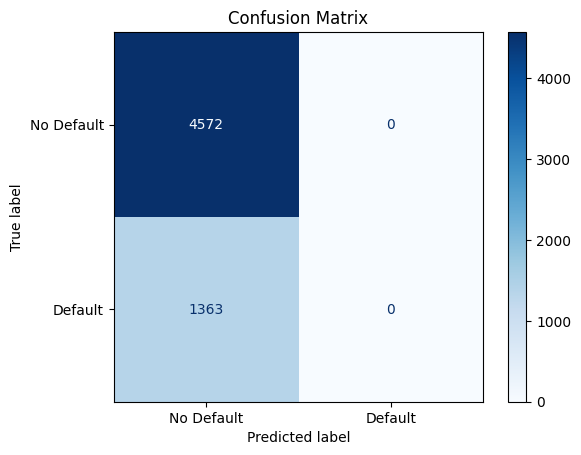

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Drop amt columns and rerun the model

In [81]:
X_train = df_train.copy(deep=True)
X_val = df_val.copy(deep=True)

print(type(df_train))

<class 'pandas.core.frame.DataFrame'>


In [82]:
X_train.drop(['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6'], axis=1, inplace=True)

X_train.drop(['pay_amt1','pay_amt2','pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'], axis=1, inplace=True)

KeyError: ignored

In [75]:
X_val.drop(['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6'], axis=1, inplace=True)

X_val.drop(['pay_amt1','pay_amt2','pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'], axis=1, inplace=True)

KeyError: ignored

In [68]:
X_train.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
11483,100000.0,2,2,1,47,0,0,0,0,0,0
7826,100000.0,2,1,2,32,1,2,0,0,-1,0
9791,60000.0,1,2,2,23,0,0,2,2,-1,0
830,50000.0,2,2,1,48,0,-1,-1,0,0,0
19643,200000.0,2,1,2,29,-2,-2,-2,-2,-2,-2


In [69]:
X_val.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
13510,30000.0,2,3,3,48,0,0,2,0,0,0
10365,180000.0,2,2,1,41,2,0,0,0,0,0
19150,70000.0,2,1,1,36,1,2,2,0,0,2
15318,60000.0,2,1,2,31,-1,-1,-1,-1,-2,-2
20674,20000.0,1,2,2,35,0,0,0,3,7,6


In [70]:
model = LogisticRegression(solver='liblinear', random_state=1)

model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

## Test the model

In [71]:
y_pred = model.predict_proba(X_val)

In [72]:
y_pred = model.predict_proba(X_val)[:, 1]

y_pred >= 0.5

array([False, False, False, ..., False, False, False])

In [73]:
defaulted = y_pred >= 0.5

(y_val == defaulted).mean() #Quality Measure called ACCURACY

0.7703454085930919